In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import seaborn as sns
matplotlib.style.use('ggplot')

In [3]:
feature_data = pd.read_csv('feature.csv')
list2 = ['PlateName','WellName','ScreenName','Project','Compound_Name','Class','Concentration']
list1 = feature_data.columns.to_list()

In [7]:
data = pd.read_csv("toxic_two_dose.csv")
data1 = data[list1]
#data1 = data1.dropna(axis=1)

In [8]:
scaler = StandardScaler()
scaler.fit(data1)
data1 = scaler.transform(data1)
pca = PCA(n_components=4)
x_new = pca.fit_transform(data1)
columns_select = ['ScreenName','Compound_Name','Class','Concentration']
df1 = data[columns_select]
result = pd.concat([df1, pd.DataFrame(x_new)], axis=1)
result.to_csv('pca_toxic.csv')
print(pca.explained_variance_ratio_)
print(np.shape(x_new))

[0.64003569 0.16996764 0.12409592 0.03492149]
(270, 4)


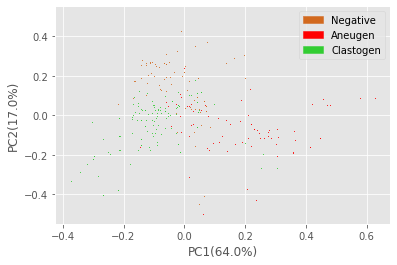

In [11]:
fig,ax = plt.subplots()
result1 = pd.read_csv('pca_toxic.csv')
xs = result1['0']
ys = result1['1']
chemical_class = result1['Class']
color = {'Negative':'chocolate','Aneugen':'red','Clastogen':'limegreen'}
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
colors = ['chocolate', 'red', 'limegreen']
labels = [ "Negative","Aneugen","Clastogen"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(labels[i]) ) for i in range(len(colors)) ]

for i in range(270):
    plt.scatter(xs[i] * scalex,ys[i] * scaley,c=color[chemical_class[i]],marker='.',s=1)

plt.xlabel("PC1(64.0%)")
plt.ylabel("PC2(17.0%)")

#plt.ylim(-0.6,0.9)
plt.legend(handles=patches,loc="upper right") 

fig.savefig('pca_toxic_two_dose.svg',dpi=600,format='svg')

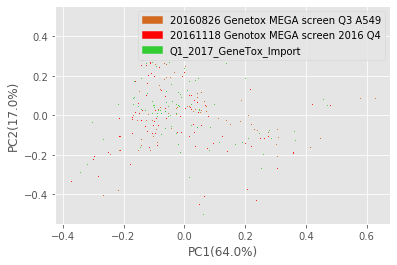

In [13]:
fig,ax = plt.subplots()
result1 = pd.read_csv('pca_toxic.csv')
xs = result1['0']
ys = result1['1']
chemical_class = result1['ScreenName']
color = {'20160826 Genetox MEGA screen Q3 A549':'chocolate','20161118 Genotox MEGA screen 2016 Q4':'red','Q1_2017_GeneTox_Import':'limegreen'}
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
colors = ['chocolate', 'red', 'limegreen']
labels = [ "20160826 Genetox MEGA screen Q3 A549","20161118 Genotox MEGA screen 2016 Q4","Q1_2017_GeneTox_Import"]
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(labels[i]) ) for i in range(len(colors)) ]

for i in range(270):
    plt.scatter(xs[i] * scalex,ys[i] * scaley,c=color[chemical_class[i]],marker='.',s=1)

plt.xlabel("PC1(64.0%)")
plt.ylabel("PC2(17.0%)")

#plt.ylim(-0.6,0.9)
plt.legend(handles=patches,loc="upper right") 

fig.savefig('pca_toxic_two_dose1.svg',dpi=600,format='svg')